# TUGAS PRAKTIKUM 10 METODE NUMERIK
__Interpolasi__

__Kelompok : AKT02__

__Anggota :__ 

```1. Antonius Aditya Rizky Wijaya (G5402221003)```

```2. Jokhanal Paskal Bastanta Brahmana (G5402221008)```

```3. Citra Dewi (G5402221035)```

```4. Muh. Fadhil Maulana Mulhayat (G5402221041)```

```5. Amanda Citra Lestari (G5402221048)```

```6. Khansa Paramytha Nareswari (G5402221062)```

<hr style="border:2px solid black"> </hr>

### __Soal 1__
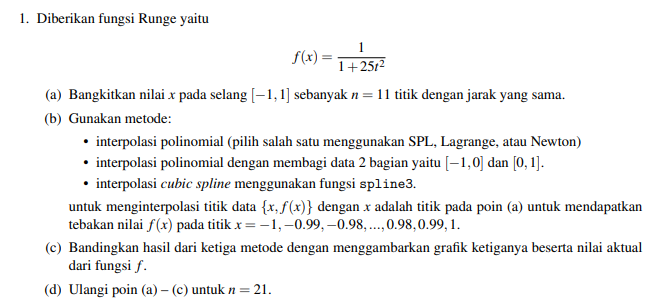

In [7]:
using Plots
function newton(x, xd, yd)
  #% sedikit trik agar bisa menghitung nilai interpolasi pada banyak 
  #% titik sekaligus. Intinya, tetap diproses satu titik demi titik.
  m=length(x);
  y=zeros(m)
  if m > 1
    for i=1:m
      # proses satu titik demi satu titik
      y[i],D =newton(x[i], xd, yd);
    end
    return y,D
  end   
  #% periksa jumlah titik dan tentukan derajat polinom
  ntitik = length(xd);
  #% hitung tabel beda-terbagi (divided-difference)
  D = zeros(ntitik,ntitik)
  D[:,1]=yd;          #% kolom pertama
  for j=2:ntitik      #% kolom ke-2 dan seterusnya
    for k=j:ntitik
        D[k,j] = (D[k,j-1]-D[k-1,j-1])/(xd[k]-xd[k-j+1]);
    end
  end 
  #% hitung interpolasi Newton
  y = D[1,1]; s = 1;
  for i=2:ntitik
    s = s * (x-xd[i-1]);
    y = y + D[i,i]*s;
  end
  return y, D
end;

In [25]:
using Plots
function spline3(x,y,m; res = true)
    # Cubic spline
    n=length(x);
    h = zeros(n); u = zeros(n);
    b = zeros(n); v = zeros(n);
    z = zeros(n);
    for i=1:n-1
        h[i]=x[i+1]-x[i];
        b[i]=(y[i+1]-y[i])/h[i];
    end
    u[2]=2*(h[1]+h[2]);
    v[2]=6*(b[2]-b[1]);
    for i=3:n-1
        u[i]=2*(h[i-1]+h[i])-h[i-1]^2/u[i-1];
        v[i]=6*(b[i]-b[i-1])-h[i-1]*v[i-1]/u[i-1];
    end
    z[n]=0;
    for i=n-1:-1:2
        z[i]=(v[i]-h[i]*z[i+1])/u[i];
    end
    if res
        println(" cubic spline")
        println("_______________________________________________")
        println("$(rpad("x",12)) S(x) ")
        println("_______________________________________________")
    end
    tc = zeros(n+m*(n-1))
    yc = zeros(n+m*(n-1))
    k = 1
    for i=1:n-1
        for j=1:m+1
            r=(x[i+1]-x[i])/(m+1);
            t=x[i]+(j-1)*r;
            dis=(j-1)*r;
            hh=x[i+1]-x[i];
            bb=(y[i+1]-y[i])/hh-hh*(z[i+1]+2*z[i])/6;
            q=0.5*z[i]+dis*(z[i+1]-z[i])/(6*hh);
            q=bb+dis*q;
            spl3=y[i]+dis*q;
            if res
                println("$(rpad(round(t,digits=2),12)) $(round(spl3,digits=8))")
            end
            tc[k] = t; yc[k] = spl3;
            k += 1
        end
    end
    if res
        println("$(rpad(round(x[n],digits=2),12)) $(round(y[n],digits=8))")
    end
    tc[end] = x[n]; yc[end] = y[n];
    
    return tc,yc
end

spline3 (generic function with 1 method)

### n= 11

#### Metode Newton

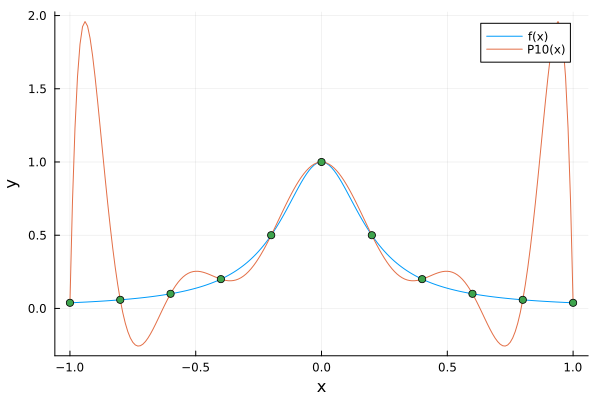

In [10]:
f(x) = 1/(1 + 25*x^2)
xd = -1:0.2:1
yd = f.(xd)
x = -1:0.01:1
ynew = newton(x, xd, yd) 

plt = plot(x, f.(x), label = "f(x)", xlabel = "x", ylabel = "y") 
plot!(x, ynew, label = "P10(x)") 
scatter!(xd, yd, label = :none)

#### Metode membagi 2 data 

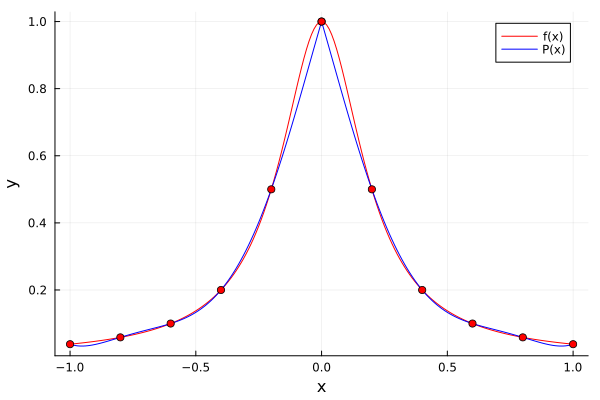

In [12]:
f(x) = 1/(1+25*x^2);
	 xd = -1:0.2:0;
	 yd = f.(xd);
	 x = -1:.01:0
	 ynew,D = newton(x,xd,yd)

using Plots
plt = plot(x,f.(x),color = :red,label = "f(x)")
plot!(x,ynew,color = :blue,label = "P(x)")
scatter!(xd,yd,color = :red,label = :none)

xd = 0:0.2:1;
yd = f.(xd);
x = 0:0.01:1;
ynew = newton(x,xd,yd);

plot!(x,f.(x),color = :red,label = :none)
plot!(x,ynew,color = :blue,label = :none)
scatter!(xd,yd,color = :red,label = :none)

xlabel!("x")
ylabel!("y")

#### Metode cubic spline 

 cubic spline
_______________________________________________
x            S(x) 
_______________________________________________
-1.0         0.03846154
-0.9         0.0476174
-0.8         0.05882353
-0.7         0.07468173
-0.6         0.1
-0.5         0.14008103
-0.4         0.2
-0.3         0.2973471
-0.2         0.5
-0.1         0.82053058
0.0          1.0
0.1          0.82053058
0.2          0.5
0.3          0.2973471
0.4          0.2
0.5          0.14008103
0.6          0.1
0.7          0.07468173
0.8          0.05882353
0.9          0.0476174
1.0          0.03846154


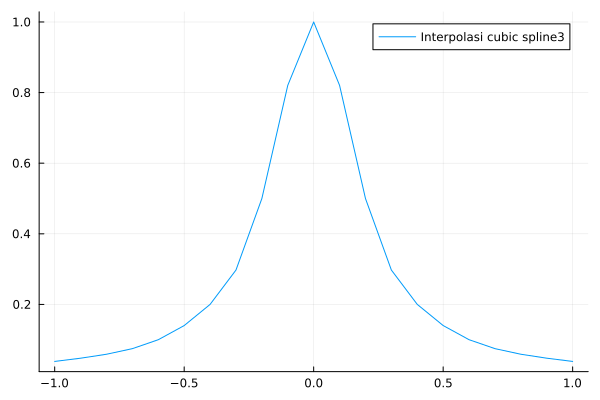

In [26]:
f(x) = 1/(1+25*x^2);
xd = -1:0.2:1;
yd = f.(xd);
m = 1 ;
xint, yint=spline3(xd,yd,m; res=true)
plot(xint, yint, label = "Interpolasi cubic spline3")

### n= 21

#### Metode Newton 

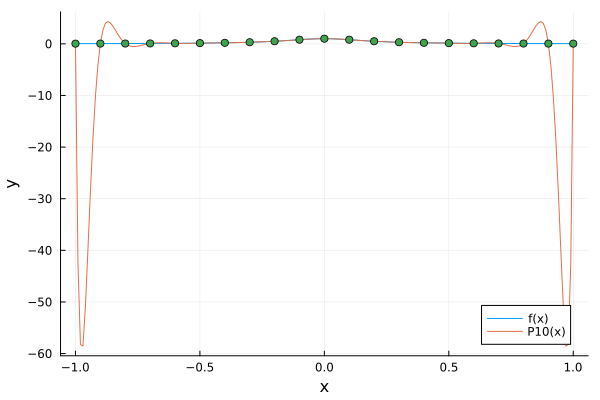

In [11]:
f(x) = 1/(1 + 25*x^2)
xd = -1:0.1:1
yd = f.(xd)
x = -1:0.01:1
ynew = newton(x, xd, yd) 

plt = plot(x, f.(x), label = "f(x)", xlabel = "x", ylabel = "y") 
plot!(x, ynew, label = "P10(x)") 
scatter!(xd, yd, label = :none)

#### Metode membagi 2 data 

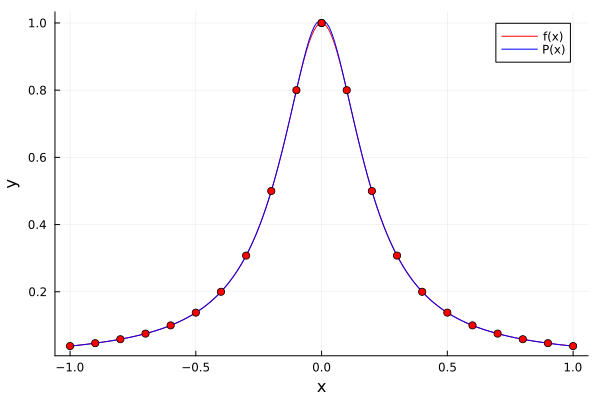

In [13]:
f(x) = 1/(1+25*x^2);
xd = -1:0.1:0;
yd = f.(xd);
x = -1:0.01:0;
ynew = newton(x,xd,yd);

plt = plot(x,f.(x),color = :red,label = "f(x)")
plot!(x,ynew,color = :blue,label = "P(x)")
scatter!(xd,yd,color = :red,label = :none)

xd = 0:0.1:1;
yd = f.(xd);
x = 0:0.01:1;
ynew = newton(x,xd,yd);

plot!(x,f.(x),color = :red,label = :none)
plot!(x,ynew,color = :blue,label = :none)
scatter!(xd,yd,color = :red,label = :none)

xlabel!("x")
ylabel!("y")

#### Metode cubic spline 

 cubic spline
_______________________________________________
x            S(x) 
_______________________________________________
-1.0         0.03846154
-0.95        0.04253422
-0.9         0.04705882
-0.85        0.05243129
-0.8         0.05882353
-0.75        0.06639405
-0.7         0.0754717
-0.65        0.08647363
-0.6         0.1
-0.55        0.11678687
-0.5         0.13793103
-0.45        0.16486456
-0.4         0.2
-0.35        0.24626816
-0.3         0.30769231
-0.25        0.38941957
-0.2         0.5
-0.15        0.64316894
-0.1         0.8
-0.05        0.93886621
0.0          1.0
0.05         0.93886621
0.1          0.8
0.15         0.64316894
0.2          0.5
0.25         0.38941957
0.3          0.30769231
0.35         0.24626816
0.4          0.2
0.45         0.16486456
0.5          0.13793103
0.55         0.11678687
0.6          0.1
0.65         0.08647363
0.7          0.0754717
0.75         0.06639405
0.8          0.05882353
0.85         0.05243129
0.9          0.04705882


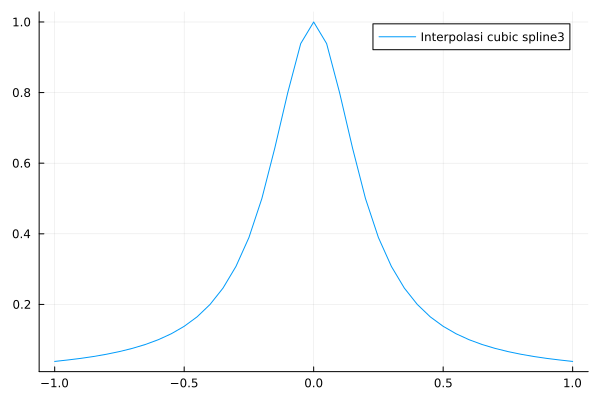

In [27]:
f(x) = 1/(1+25*x^2);
xd = -1:0.1:1;
yd = f.(xd);
m = 1 ;
xint, yint = spline3(xd,yd,m; res = true)
plot(xint, yint, label = "Interpolasi cubic spline3")

#### Kesimpulan

Ketiga grafik tersebut mengilustrasikan tiga pendekatan interpolasi yang berbeda untuk fungsi Runge $ f(x) = \frac{1}{1 + 25x^2} $ pada rentang x dari -1 hingga 1.

Grafik pertama menunjukkan hasil dari interpolasi polinomial Newton. Dalam metode ini, interpolasi dilakukan menggunakan polinom yang melewati semua titik data. Saat menggunakan satu interval interpolasi seperti [-1,1], grafik hasiln akan berbeda dari grafik fungsi f. Nilai hasil interpolasi cenderung sama, namun hanya di titik tertentu yang sesuai dengan nilai aktual. 

Grafik kedua menampilkan hasil interpolasi polinomial dengan membagi data menjadi dua bagian. Pendekatan ini membagi rentang data menjadi dua interval [-1, 0] dan [0, 1], dan kemudian melakukan interpolasi polinomial terpisah pada masing-masing interval. Ini mengurangi efek runtinggel yang terlihat pada pendekatan sebelumnya dan menunjukan nilai-nilai hasil interpolasi hampir sama dengan nilai aktual fungsi f terutama di sekitar ujung rentang. Namun, masih terdapat beberapa ketidaksesuaian di sekitar titik-titik ekstrem.  

Grafik ketiga menunjukkan interpolasi spline kubik. Metode ini menggunakan polinom kubik antara titik-titik data untuk menciptakan kurva yang lebih halus. Hasilnya adalah kurva yang lebih halus dan lebih baik menyesuaikan dengan fungsi asli, bahkan di dekat ujung rentang.

Dari ketiga grafik tersebut, interpolasi spline kubik tampaknya memberikan hasil yang paling baik, dengan kurva yang paling dekat dengan fungsi asli di sepanjang rentang yang diberikan.

<hr style="border:2px solid black"> </hr>

### __Soal 2__
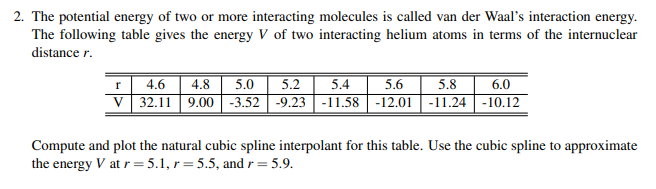

In [3]:
function spline3(x,y,m; res = true)
    # Cubic spline
    n=length(x);
    h = zeros(n); u = zeros(n);
    b = zeros(n); v = zeros(n);
    z = zeros(n);
    for i=1:n-1
        h[i]=x[i+1]-x[i];
        b[i]=(y[i+1]-y[i])/h[i];
    end
    u[2]=2*(h[1]+h[2]);
    v[2]=6*(b[2]-b[1]);
    for i=3:n-1
        u[i]=2*(h[i-1]+h[i])-h[i-1]^2/u[i-1];
        v[i]=6*(b[i]-b[i-1])-h[i-1]*v[i-1]/u[i-1];
    end
    z[n]=0;
    for i=n-1:-1:2
        z[i]=(v[i]-h[i]*z[i+1])/u[i];
    end
    if res
        println(" cubic spline")
        println("_________________")
        println("$(rpad("x",12)) S(x) ")
        println("_________________")
    end
    tc = zeros(n+m*(n-1))
    yc = zeros(n+m*(n-1))
    k = 1
    for i=1:n-1
        for j=1:m+1
            r=(x[i+1]-x[i])/(m+1);
            t=x[i]+(j-1)*r;
            dis=(j-1)*r;
            hh=x[i+1]-x[i];
            bb=(y[i+1]-y[i])/hh-hh*(z[i+1]+2*z[i])/6;
            q=0.5*z[i]+dis*(z[i+1]-z[i])/(6*hh);
            q=bb+dis*q;
            spl3=y[i]+dis*q;
            if res
                println("$(rpad(round(t,digits=2),12)) $(round(spl3,digits=8))")
            end
            tc[k] = t; yc[k] = spl3;
            k += 1
        end
    end
    if res
        println("$(rpad(round(x[n],digits=2),12)) $(round(y[n],digits=8))")
    end
    tc[end] = x[n]; yc[end] = y[n];
    
    return tc,yc
end

xk = [4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0]
yk = [32.11, 9.00, -3.52, -9.23, -11.58, -12.02, -11.24, -10.12]
m=1
x,y=spline3(xk,yk,m; res = true)

 cubic spline
_________________
x            S(x) 
_________________
4.6          32.11
4.7          19.65312436
4.8          9.0
4.9          1.47437693
5.0          -3.52
5.1          -6.93563209
5.2          -9.23
5.3          -10.71059859
5.4          -11.58
5.5          -11.99322355
5.6          -12.02
5.7          -11.72525721
5.8          -11.24
5.9          -10.6907476
6.0          -10.12


([4.6, 4.699999999999999, 4.8, 4.9, 5.0, 5.1, 5.2, 5.300000000000001, 5.4, 5.5, 5.6, 5.699999999999999, 5.8, 5.9, 6.0], [32.11, 19.653124355891446, 9.0, 1.4743769323256615, -3.52, -6.935632085194092, -9.23, -10.710598591549296, -11.58, -11.993223548608723, -12.02, -11.725257214015802, -11.24, -10.690747595328066, -10.12])

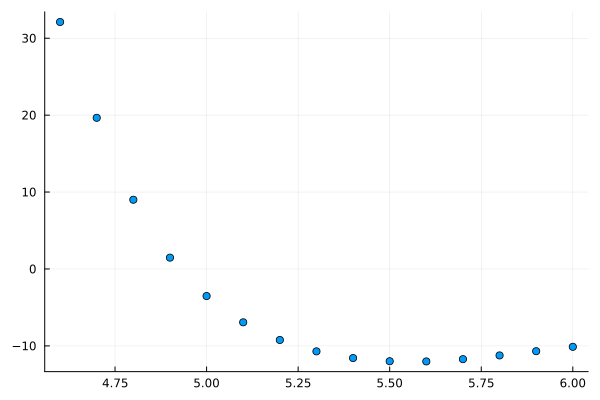

In [4]:
using Plots
scatter(x,y,legend = :false)

<hr style="border:2px solid black"> </hr>